<a href="https://colab.research.google.com/github/sagar-shende/Sagar-demo/blob/main/Space_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/space_missions.csv',encoding='latin-1')

In [3]:
df.head(2)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success


In [4]:
df.tail(2)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


In [5]:
df.shape

(4630, 9)

In [6]:
print('No of Row:',df.shape[0])
print('No of Column:',df.shape[1])

No of Row: 4630
No of Column: 9


In [7]:
print('Total Elements:',df.size)

Total Elements: 41670


In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [8]:
df.dtypes

,0
Company,object
Location,object
Date,object
Time,object
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [12]:
df['Time'] = df['Time'].astype('datetime64[ns]')

In [13]:
df.dtypes

,0
Company,object
Location,object
Date,datetime64[ns]
Time,datetime64[ns]
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [19]:
df['Price'] = df['Price'].replace('[\$,]','',regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-546977175.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]','',regex=True).astype(float)


In [20]:
df.dtypes

,0
Company,object
Location,object
Date,datetime64[ns]
Time,datetime64[ns]
Rocket,object
Mission,object
RocketStatus,object
Price,float64
MissionStatus,object
price,float64


In [21]:
# Null Value
df.isnull()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,price
0,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,False,False,False,False,False,False
4626,False,False,False,False,False,False,False,True,False,True
4627,False,False,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,True,False,True


In [22]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,3365
MissionStatus,0
price,3365


In [23]:
df.isnull().sum().sum()

np.int64(6857)

In [26]:
# golden Rule for Price column
print('Percentage of Nulls in Price column:',(df['Price'].isnull().sum())/len(df)*100)

Percentage of Nulls in Price column: 72.67818574514038


In [27]:
# golden Rule for Time column
print('Percentage of Nulls in Price column:',(df['Time'].isnull().sum())/len(df)*100)

Percentage of Nulls in Price column: 2.7429805615550755


In [28]:
# Imputation for Price column - Finding Skewness
print('skewness for price column:',df['Price'].skew())

skewness for price column: 11.681483249606337


In [29]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [30]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,0
MissionStatus,0
price,3365


skewness: 22.32896072238317


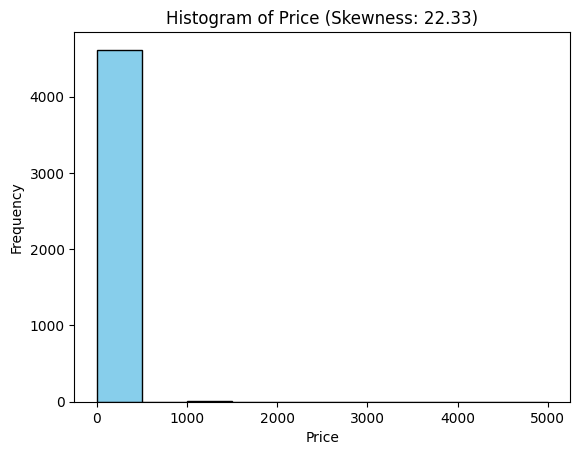

In [31]:
# calculate skewness
skew_value = df['Price'].skew()
print('skewness:',skew_value)

# plot histogram
plt.hist(df['Price'],bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Price (Skewness: {skew_value:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Duplicate
Duplicates = df[df.duplicated()]
print('Number of Duplicate row:', len(Duplicates))

Number of Duplicate row: 1


In [34]:
start = len(df)
df.drop_duplicates(inplace=True)
end = len(df)
print('Number of Duplicate row removed:', start-end)

Number of Duplicate row removed: 0


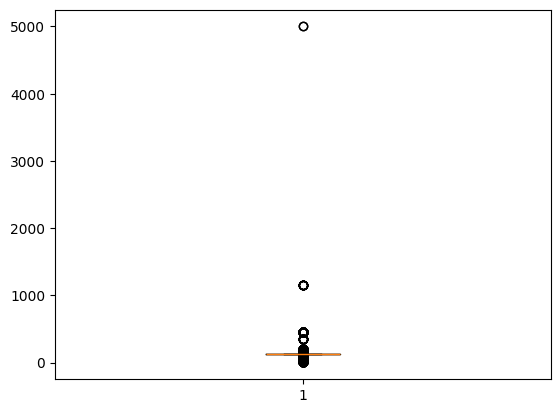

In [35]:
#outliers
plt.boxplot(df['Price'])
plt.show()

In [41]:
# remove Outliers
def remove_outliers_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

    # Update only the price column in the original DataFrame
    df = remove_outliers_column(df, 'Price')

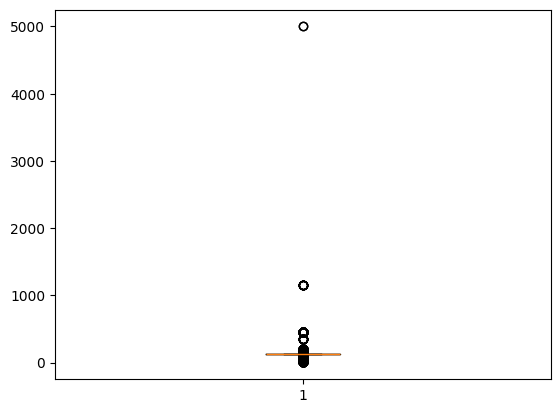

In [42]:
plt.boxplot(df['Price'])
plt.show()

In [43]:
df = remove_outliers_column(df, 'Price')

In [58]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus', 'price'],
      dtype='object')

In [53]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,price
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,2025-10-06 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,128.303913,Success,NaN
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,2025-10-06 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,128.303913,Success,NaN
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,2025-10-06 16:44:00,Vanguard,Vanguard TV3,Retired,128.303913,Failure,NaN
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,2025-10-06 03:48:00,Juno I,Explorer 1,Retired,128.303913,Success,NaN
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,2025-10-06 07:33:00,Vanguard,Vanguard TV3BU,Retired,128.303913,Failure,NaN


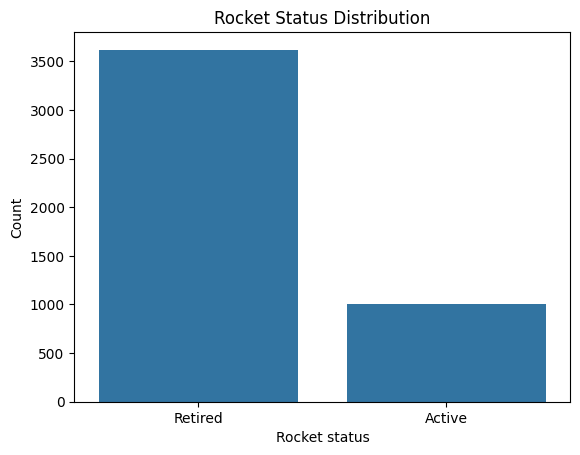

In [55]:
# Rocket Status
sns.countplot(x='RocketStatus', data=df)
plt.xlabel('Rocket status')
plt.ylabel('Count')
plt.title('Rocket Status Distribution')
plt.show()

In [56]:
df['RocketStatus'].value_counts().sort_values(ascending=False)

,count
RocketStatus,
Retired,3620
Active,1009


In [59]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus', 'price'],
      dtype='object')

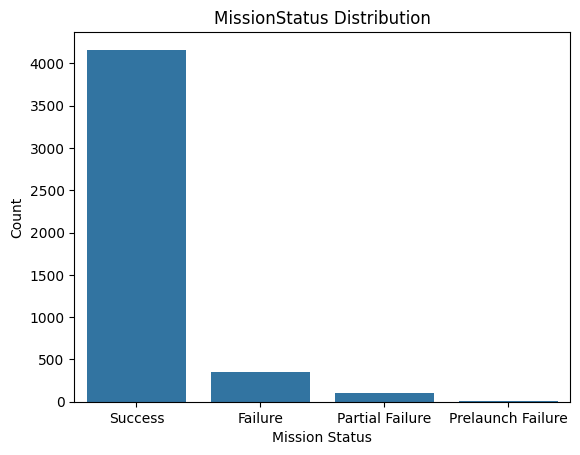

In [60]:
# Mission Status
sns.countplot(x='MissionStatus', data=df)
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.title('MissionStatus Distribution')
plt.show()


In [61]:
df['MissionStatus'].value_counts().sort_values(ascending=False)

,count
MissionStatus,
Success,4161
Failure,357
Partial Failure,107
Prelaunch Failure,4


In [63]:
Success_companies = df[df['MissionStatus'] == 'Success']['Company']

# Get unique company names (if you want only unique ones)
unique_success_companies = Success_companies.unique()

# Print the Result
print("Companies with Successful Missions:")
print( unique_success_companies)

Companies with Successful Missions:
['RVSN USSR' 'AMBA' 'US Navy' 'US Air Force' 'General Dynamics' 'NASA'
 'Martin Marietta' "Armée de l'Air" 'ASI' 'OKB-586' 'CECLES' 'Yuzhmash'
 'UT' 'CNES' 'CASC' 'Roscosmos' 'ISAS' 'RAE' 'MHI' 'ESA' 'ISRO'
 'Arianespace' 'IAI' 'Boeing' 'Douglas' 'Northrop' 'Lockheed' 'VKS RF'
 'MITT' 'ILS' 'SRC' 'Sea Launch' 'Kosmotras' 'Eurockot' 'Starsem' 'ULA'
 'SpaceX' 'ISA' 'Land Launch' 'KCST' 'KARI' 'JAXA' 'CASIC' 'Khrunichev'
 'Blue Origin' 'ExPace' 'Rocket Lab' 'i-Space' 'IRGC' 'Galactic Energy'
 'Virgin Orbit' 'GK LS' 'Virgin Galactic' 'Astra' 'CAS Space']


Text(0, 0.5, 'count of Successful Missions')

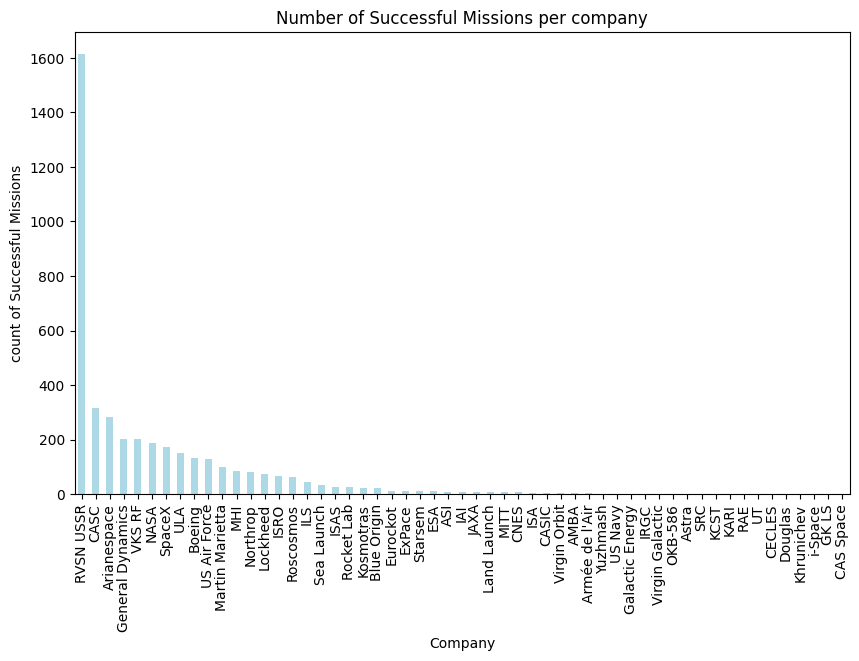

In [64]:
Success_companies = df[df['MissionStatus'] == 'Success']['Company']

Success_companies_count = Success_companies.value_counts()

# plot the data
plt.figure(figsize=(10, 6))
Success_companies_count.plot(kind='bar', color='lightblue')

plt.title('Number of Successful Missions per company')
plt.xlabel('Company')
plt.ylabel('count of Successful Missions')



In [68]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus', 'price'],
      dtype='object')

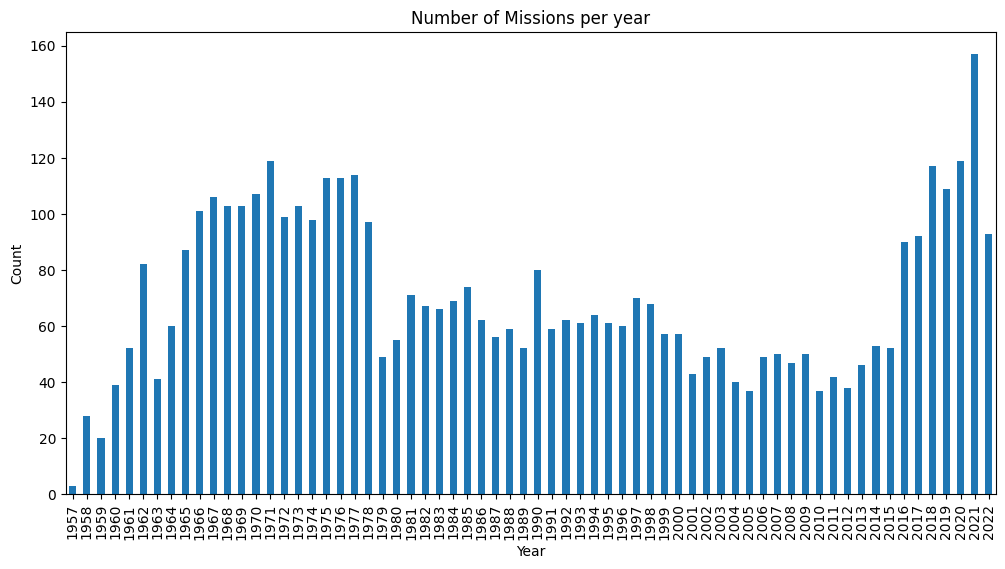

In [66]:
# Missions over time
plt.figure(figsize=(12,6))
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Missions per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

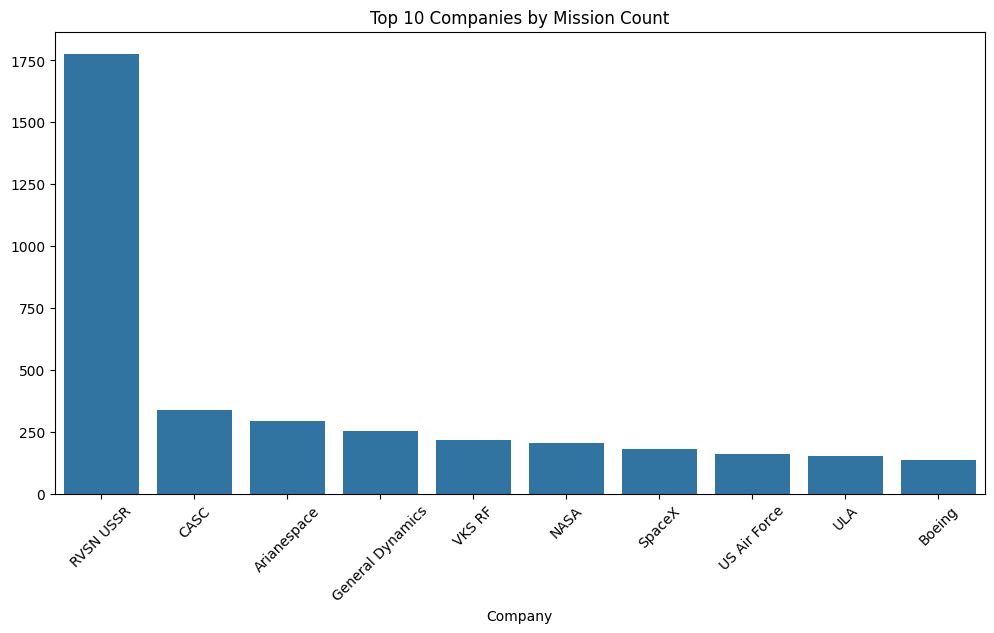

In [69]:
# Company vs Missions
plt.figure(figsize=(12,6))
top_companies = df['Company'].value_counts().head(10)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45)
plt.title("Top 10 Companies by Mission Count")
plt.show()


In [10]:
df.tail()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success
